<a href="https://colab.research.google.com/github/Precillieo/Financial-Model/blob/main/Mr_Olowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup and Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
!pip install rgf-python 
!pip install catboost
!pip install lightgbm
from rgf.sklearn import RGFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [2]:
df= pd.read_excel('/content/drive/MyDrive/Mr Olowe/Data Extract for Machine Learning 20201213.xlsx')
val= pd.read_excel('/content/drive/MyDrive/Mr Olowe/Data Extract for Model Performance (Precious) (2) (1).xlsx')
df.shape

(2981, 30)

In [3]:
val.shape

(3449, 28)

In [4]:
df.head()

,loan_amount,interest_due,amount_due,tenor,interest_rate,status_id,status,card_network,card_expiry,bank,phone_network,date_of_birth,tier,selfie_id_check,gender,marital_status,no_of_dependent,type_of_residence,educational_attainment,employment_status,sector_of_employment,monthly_net_income,work_start_date,work_email_validated,address,requested_amount,purpose,proposed_payday,credit_score,location
0,3600.0,1277.64,4877.64,21 days,35.49,1,RUNNING,Mastercard,102023.0,Guaranty Trust Bank,805,1984-07-25,NaN,Pending,Male,Married,2,Parents Apartment,Diploma/School Cert,Self Employed,Agriculture,"10,000 - 54,999",2017-10-07 01:00:00,0,Umuahia,12000.0,Business,30 days,63.040,abia
1,10000.0,500.00,0.00,1 days,5.00,2,SETTLED,Visa,NaN,NaN,813,1986-11-14,NaN,Successful,Female,Married,3 or more,Own House,"BSc, HND and Other Equivalent",Self Employed,Information Technology,"100,000 - 199,999",2012-06-01 01:00:00,0,Umuahia,15000.0,Personal,30 days,65.220,abia
2,10000.0,500.00,0.00,1 days,5.00,2,SETTLED,Mastercard,92023.0,United Bank for Africa,813,1986-11-14,NaN,Successful,Female,Married,3 or more,Own House,"BSc, HND and Other Equivalent",Self Employed,Information Technology,"100,000 - 199,999",2012-06-01 01:00:00,0,Umuahia,15000.0,Personal,30 days,65.220,abia
3,3600.0,1277.64,5573.64,21 days,35.49,5,PAST DUE,Mastercard,22023.0,United Bank for Africa,703,1980-05-17,NaN,Pending,Male,Single,0,Own House,Diploma/School Cert,Local Govt: Public,Agriculture,"10,000 - 54,999",2007-07-01 00:00:00,0,Aba,15000.0,Medical,30 days,66.904,abia
4,5000.0,424.11,0.00,30 days,8.60,2,SETTLED,Mastercard,42022.0,Polaris Bank,803,1975-01-20,Tier 2,Successful,NaN,Married,2,NaN,"BSc, HND and Other Equivalent",Self Employed,Information Technology,"100,000 - 199,999",2002-01-01 00:00:00,0,NaN,20000.0,Medical,30 days,68.670,abia


In [5]:
val.head()

,id,loan_amount,interest_due,tenor,interest_rate,card_network,card_expiry,bank,phone_network,date_of_birth,tier,selfie_id_check,gender,marital_status,no_of_dependent,type_of_residence,educational_attainment,employment_status,sector_of_employment,monthly_net_income,work_start_date,work_email_validated,address,requested_amount,purpose,proposed_payday,credit_score,location
0,6216,32000.0,3452.84,30 days,10.94,Visa,92021.0,United Bank for Africa,703,1973-02-21,Tier 3,Successful,NaN,Married,4,NaN,MSc and Above,Employed,Information Technology,"Above 200,000",2001-01-01,0,NaN,32000.0,Personal,30 days,1.0129,lagos
1,16252,3600.0,719.64,7 days,19.99,Mastercard,82022.0,Guaranty Trust Bank,807,1995-09-10,Tier 1,Pending,Male,Single,0,Rented Apartment,"BSc, HND and Other Equivalent",Private Company,Other Financial,"100,000 - 199,999",2020-07-01,0,Lagos,3600.0,Medical,30 days,1.0000,lagos
2,16244,10000.0,2520.00,14 days,25.20,Mastercard,112023.0,United Bank for Africa,815,1998-07-16,Tier 1,Failed,Male,Married,0,Own House,MSc and Above,Enterprise,Banking,"Above 200,000",2014-12-24,0,Lagos,10000.0,School Fees,30 days,1.0000,edo
3,16241,10000.0,2520.00,14 days,25.20,Mastercard,92022.0,Guaranty Trust Bank,706,1997-09-10,Tier 1,Pending,Female,Single,0,Rented Apartment,"BSc, HND and Other Equivalent",Private Company,Other Financial,"100,000 - 199,999",2016-11-16,1,"Gbagada, Lagos",10000.0,Personal,30 days,1.0000,lagos
4,12689,30000.0,4500.00,7 days,15.00,Mastercard,12022.0,Fidelity Bank,703,1978-01-06,Tier 1,Pending,Male,Divorced,3 or more,Rented Apartment,MSc and Above,Private Company,Other Financial,"Above 200,000",2018-03-19,0,"4 Perez Drive, Off Rock Drive, Lekki Phase, Lagos",5000.0,Personal,15 days,1.0000,lagos


In [6]:
real_test = df[df.status_id == 1]
data= val
#real_test

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loan_amount             2981 non-null   float64       
 1   interest_due            2981 non-null   float64       
 2   amount_due              2981 non-null   float64       
 3   tenor                   2981 non-null   object        
 4   interest_rate           2958 non-null   float64       
 5   status_id               2981 non-null   int64         
 6   status                  2981 non-null   object        
 7   card_network            2981 non-null   object        
 8   card_expiry             2941 non-null   float64       
 9   bank                    2941 non-null   object        
 10  phone_network           2981 non-null   int64         
 11  date_of_birth           2981 non-null   datetime64[ns]
 12  tier                    2472 non-null   object  

In [8]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3449 entries, 0 to 3448
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      3449 non-null   int64         
 1   loan_amount             3449 non-null   float64       
 2   interest_due            3449 non-null   float64       
 3   tenor                   3449 non-null   object        
 4   interest_rate           3426 non-null   float64       
 5   card_network            3449 non-null   object        
 6   card_expiry             3365 non-null   float64       
 7   bank                    3365 non-null   object        
 8   phone_network           3449 non-null   int64         
 9   date_of_birth           3449 non-null   datetime64[ns]
 10  tier                    3449 non-null   object        
 11  selfie_id_check         3449 non-null   object        
 12  gender                  796 non-null    object  

## Visualizing the Target Value

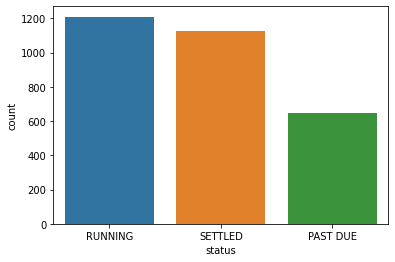

In [9]:
sns.countplot(x= df['status'])

## Filling Missing Values

In [10]:
df.dtypes

loan_amount                      float64
interest_due                     float64
amount_due                       float64
tenor                             object
interest_rate                    float64
status_id                          int64
status                            object
card_network                      object
card_expiry                      float64
bank                              object
phone_network                      int64
date_of_birth             datetime64[ns]
tier                              object
selfie_id_check                   object
gender                            object
marital_status                    object
no_of_dependent                   object
type_of_residence                 object
educational_attainment            object
employment_status                 object
sector_of_employment              object
monthly_net_income                object
work_start_date           datetime64[ns]
work_email_validated               int64
address         

In [11]:
df.isnull().sum()

loan_amount                  0
interest_due                 0
amount_due                   0
tenor                        0
interest_rate               23
status_id                    0
status                       0
card_network                 0
card_expiry                 40
bank                        40
phone_network                0
date_of_birth                0
tier                       509
selfie_id_check            383
gender                    2423
marital_status               0
no_of_dependent              0
type_of_residence         2423
educational_attainment       0
employment_status            0
sector_of_employment         0
monthly_net_income           0
work_start_date              0
work_email_validated         0
address                   2423
requested_amount             0
purpose                      0
proposed_payday              0
credit_score                 0
location                     0
dtype: int64

In [12]:
val.isnull().sum()

id                           0
loan_amount                  0
interest_due                 0
tenor                        0
interest_rate               23
card_network                 0
card_expiry                 84
bank                        84
phone_network                0
date_of_birth                0
tier                         0
selfie_id_check              0
gender                    2653
marital_status               0
no_of_dependent              0
type_of_residence         2653
educational_attainment       0
employment_status            0
sector_of_employment         0
monthly_net_income           0
work_start_date              1
work_email_validated         0
address                   2653
requested_amount             0
purpose                      0
proposed_payday              0
credit_score                 0
location                     0
dtype: int64

### Fill out `tier` and `selfie_id_check` columns 

In [13]:
df[df.tier.isna()].T

,0,1,2,3,28,29,30,31,32,33,36,38,71,74,75,98,99,100,131,132,133,160,168,169,170,188,189,190,191,192,193,194,195,196,197,261,269,270,271,272,...,2862,2866,2867,2868,2869,2870,2872,2873,2874,2875,2876,2877,2878,2879,2880,2881,2883,2885,2886,2887,2890,2891,2892,2893,2894,2895,2896,2897,2898,2899,2900,2901,2902,2903,2904,2905,2906,2912,2913,2914
loan_amount,3600,10000,10000,3600,3600,3600,3600,3600,3600,3600,3600,3600,2500,2500,3600,3600,3600,3600,3600,3600,3600,3600,3600,3600,3600,3600,3600,3600,3600,3600,3600,3600,3600,3600,3600,3600,3600,3600,3600,3600,...,3600,3600,3600,2500,3600,3600,500,5000,3000,3000,2500,2500,3600,2500,2500,2500,1234.56,2500,2500,288.88,2000,200,2500,2500,2500,2500,3000,2500,2500,3000,3000,2500,100,100,100,100,500,500,2500,2500
interest_due,1277.64,500,500,1277.64,907.2,907.2,1277.64,1277.64,1277.64,719.64,719.64,1277.64,125,125,907.2,907.2,907.2,1277.64,1277.64,907.2,907.2,1277.64,1277.64,1277.64,1277.64,1277.64,907.2,907.2,1277.64,907.2,1277.64,907.2,1277.64,1277.64,907.2,180,907.2,1277.64,1277.64,907.2,...,1277.64,1277.64,907.2,125,1277.64,1277.64,125,1250,150,750,125,125,907.2,675,125,125,308.64,125,125,72.22,500,25,125,125,125,499.75,810,125,125,750,750,125,25,25,25,25,125,125,125,125
amount_due,4877.64,0,0,5573.64,0,0,4377.64,0,4877.64,4319.64,4319.64,4877.64,0,1547.5,5107.2,5503.2,0,4875.64,4877.64,4507.2,4507.2,0,4877.64,4877.64,4877.64,4877.64,4556.2,4507.2,4877.64,0,4877.64,1911.2,5123.64,4877.64,4456.2,0,5172.39,5123.64,0,0,...,0,5623.64,4958.66,0,5623.64,0,0,0,0,0,0,0,4273.54,0,0,0,-7997.85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tenor,21 days,1 days,1 days,21 days,14 days,14 days,21 days,21 days,21 days,7 days,7 days,21 days,1 days,1 days,14 days,14 days,14 days,21 days,21 days,14 days,14 days,21 days,21 days,21 days,21 days,21 days,14 days,14 days,21 days,14 days,21 days,14 days,21 days,21 days,14 days,1 days,14 days,21 days,21 days,14 days,...,21 days,21 days,14 days,1 days,21 days,21 days,15 days,15 days,1 days,15 days,1 days,1 days,14 days,14 days,1 days,1 days,15 days,1 days,1 days,15 days,15 days,15 days,1 days,1 days,1 days,7 days,14 days,1 days,1 days,15 days,21 days,1 days,15 days,15 days,15 days,15 days,15 days,15 days,1 days,1 days
interest_rate,35.49,5,5,35.49,25.2,25.2,35.49,35.49,35.49,19.99,19.99,35.49,5,5,25.2,25.2,25.2,35.49,35.49,25.2,25.2,35.49,35.49,35.49,35.49,35.49,25.2,25.2,35.49,25.2,35.49,25.2,35.49,35.49,25.2,5,25.2,35.49,35.49,25.2,...,35.49,35.49,25.2,NaN,35.49,35.49,25,25,NaN,25,NaN,NaN,25.2,NaN,NaN,NaN,25,NaN,NaN,25,25,12.5,NaN,NaN,NaN,19.99,NaN,NaN,5,25,NaN,NaN,25,25,25,25,25,25,NaN,NaN
status_id,1,2,2,5,2,2,1,2,1,1,1,1,2,5,5,5,2,1,1,1,1,2,1,1,1,1,5,1,1,2,1,5,5,1,5,2,5,5,2,2,...,2,5,5,2,5,2,2,2,2,2,2,2,5,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
status,RUNNING,SETTLED,SETTLED,PAST DUE,SETTLED,SETTLED,RUNNING,SETTLED,RUNNING,RUNNING,RUNNING,RUNNING,SETTLED,PAST DUE,PAST DUE,PAST DUE,SETTLED,RUNNING,RUNNING,RUNNING,RUNNING,SETTLED,RUNNING,RUNNING,RUNNING,RUNNING,PAST DUE,RUNNING,RUNNING,SETTLED,RUNNING,PAST DUE,PAST DUE,RUNNING,PAST DUE,SETTLED,PAST DUE,PAST DUE,SETTLED,SETTLED,...,SETTLED,PAST DUE,PAST DUE,SETTLED,PAST DUE,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED,PAST DUE,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED
card_network,Mastercard,Visa,Mastercard,Mastercard,Visa,Visa,Visa,Mastercard,Visa,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Visa,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,...,Visa,Mastercard,Mastercard,Mastercard,Visa,Mastercard,Mastercard,Mastercard,Visa,Visa,Mastercard,Mastercard,Mastercard,Mastercard,Masterc

In [14]:
df.tier.value_counts()

Tier 1    1874
Tier 2     406
Tier 3     192
Name: tier, dtype: int64

In [15]:
val.tier.value_counts()

Tier 1    2532
Tier 2     665
Tier 3     252
Name: tier, dtype: int64

In [16]:
df.tier.fillna(df.tier.mode()[0], inplace=True)
#val.tier.fillna(val.tier.mode()[0], inplace= True)
df.tier.isna().sum()

0

In [17]:
val.tier.isna().sum()

0

In [18]:
df[df.selfie_id_check.isna()].T

,33,38,52,123,128,131,132,141,147,162,164,173,175,183,185,188,190,196,198,208,211,274,289,308,311,313,321,334,348,356,358,369,370,373,375,376,380,388,396,414,...,2549,2550,2551,2552,2553,2555,2556,2557,2561,2576,2586,2588,2591,2605,2618,2623,2626,2643,2648,2653,2681,2687,2688,2702,2704,2713,2714,2724,2727,2730,2757,2760,2763,2766,2769,2794,2820,2825,2826,2843
loan_amount,3600,3600,5000,5000,5000,3600,3600,5000,5000,5000,3750,5000,5000,5000,5000,3600,3600,3600,5000,5000,5000,5000,5000,3600,5000,5000,5000,5000,5000,3600,3600,3600,3600,3600,3600,3600,5000,5000,5000,5000,...,3600,3600,3600,3600,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,3600,3600,5000,5000,3600,3600,3600,3600,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
interest_due,719.64,1277.64,1000,1000,1000,1277.64,907.2,1000,1000,1000,1000,1000,1000,1000,1000,1277.64,907.2,1277.64,1000,1000,1000,1000,1000,900,1000,1000,1000,1000,1000,1277.64,1277.64,907.2,907.2,907.2,1277.64,907.2,1000,1000,1000,1000,...,907.2,1277.64,900,907.2,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,907.2,907.2,1000,1000,1277.64,907.2,907.2,907.2,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
amount_due,4319.64,4877.64,6000,6000,6000,4877.64,4507.2,6000,6000,6000,4750,6000,6000,6000,6000,4877.64,4507.2,4877.64,6000,6000,6000,6000,6000,4700,0,6000,6000,6000,6000,4877.64,4877.64,4507.2,4451.2,4411.2,0,4507.2,6000,6000,6000,6000,...,4507.2,4877.64,4554,4507.2,6000,0,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,4507.2,4507.2,6000,6000,4877.64,4507.2,4507.2,4507.2,6000,6000,6000,6000,6000,6000,6000,6000,0,6000,6000
tenor,7 days,21 days,4 weeks,1 months,30 days,21 days,14 days,1 months,15 days,1 months,15 days,1 months,30 days,1 months,1 months,21 days,14 days,21 days,15 days,15 days,4 weeks,3 weeks,3 weeks,10 days,1 months,1 months,3 weeks,1 months,30 days,21 days,21 days,14 days,14 days,14 days,21 days,14 days,15 days,1 months,1 months,1 months,...,14 days,21 days,10 days,14 days,1 months,15 days,15 days,1 months,1 months,3 weeks,1 months,15 days,15 days,3 weeks,1 months,15 days,30 days,1 months,15 days,3 weeks,3 weeks,14 days,14 days,15 days,1 months,21 days,14 days,14 days,14 days,3 weeks,1 months,4 weeks,30 days,20 days,4 weeks,4 weeks,15 days,30 days,4 weeks,4 weeks
interest_rate,19.99,35.49,18.66,18.17,17.74,35.49,25.2,19.11,18.6,19.09,18.77,19.03,18.89,18.43,18.36,35.49,25.2,35.49,19.59,18.68,18.63,19.19,18.39,25,19.03,18.94,18.49,19.32,17.4,35.49,35.49,25.2,25.2,25.2,35.49,25.2,19.43,19.24,19.11,18.87,...,25.2,35.49,25,25.2,19.59,19.48,19.4,19.24,19.16,18.77,18.6,18.57,18.55,18.43,18.26,18.25,18.17,18.01,17.96,17.92,17.52,25.2,25.2,18.49,18.44,35.49,25.2,25.2,25.2,19.29,18.6,18.55,18.49,18.44,18.36,17.96,17.57,17.4,17.32,17.63
status_id,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,2,1,1,1,1,1,1,5,5,5,2,5,1,1,1,1,...,1,1,5,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1
status,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,PAST DUE,SETTLED,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,PAST DUE,PAST DUE,PAST DUE,SETTLED,PAST DUE,RUNNING,RUNNING,RUNNING,RUNNING,...,RUNNING,RUNNING,PAST DUE,RUNNING,RUNNING,SETTLED,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,SETTLED,RUNNING,RUNNING
card_network,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Visa,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Visa,Visa,Visa,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Master

In [19]:
df.selfie_id_check.value_counts(dropna=False)

Successful    1141
Pending        817
Failed         640
NaN            383
Name: selfie_id_check, dtype: int64

In [20]:
#val.selfie_id_check.value_counts(dropna=False)

In [21]:
df[df.selfie_id_check.isna()].status.value_counts()

RUNNING     326
PAST DUE     38
SETTLED      19
Name: status, dtype: int64

In [22]:
df[df.status=='SETTLED'].selfie_id_check.value_counts(dropna=False)

Successful    531
Pending       316
Failed        258
NaN            19
Name: selfie_id_check, dtype: int64

In [23]:
df[df.status=='PAST DUE'].selfie_id_check.value_counts(dropna=False)

Pending       289
Successful    185
Failed        135
NaN            38
Name: selfie_id_check, dtype: int64

In [24]:
df.loc[df.selfie_id_check.isna() & df.status=='SETTLED', 'selfie_id_check'] == 'Successful'
df.selfie_id_check.fillna('Pending', inplace=True)

In [25]:
val.selfie_id_check.isna().sum()

0

In [26]:
print(val.shape)

(3449, 28)


In [27]:
print(df.shape)

(2981, 30)


### For the `gender`, `type_of_residence`, & `address` columns:

In [28]:
df[df.gender.isna()].head(1)

,loan_amount,interest_due,amount_due,tenor,interest_rate,status_id,status,card_network,card_expiry,bank,phone_network,date_of_birth,tier,selfie_id_check,gender,marital_status,no_of_dependent,type_of_residence,educational_attainment,employment_status,sector_of_employment,monthly_net_income,work_start_date,work_email_validated,address,requested_amount,purpose,proposed_payday,credit_score,location
4,5000.0,424.11,0.0,30 days,8.6,2,SETTLED,Mastercard,42022.0,Polaris Bank,803,1975-01-20,Tier 2,Successful,NaN,Married,2,NaN,"BSc, HND and Other Equivalent",Self Employed,Information Technology,"100,000 - 199,999",2002-01-01,0,NaN,20000.0,Medical,30 days,68.67,abia


In [29]:
df.gender.value_counts(dropna=False)

NaN       2423
Male       411
Female     147
Name: gender, dtype: int64

In [30]:
val.gender.value_counts(dropna= False)

NaN       2653
Male       592
Female     204
Name: gender, dtype: int64

In [31]:
df[~df.gender.isna()].status.value_counts()

RUNNING     236
SETTLED     190
PAST DUE    132
Name: status, dtype: int64

In [32]:
#val[~val.gender.isna()].status.value_counts()

They don't seem to contribute much to the data so I'll drop them

In [33]:
df.drop(['gender', 'type_of_residence', 'address'], 1, inplace=True)
df.columns

Index(['loan_amount', 'interest_due', 'amount_due', 'tenor', 'interest_rate',
       'status_id', 'status', 'card_network', 'card_expiry', 'bank',
       'phone_network', 'date_of_birth', 'tier', 'selfie_id_check',
       'marital_status', 'no_of_dependent', 'educational_attainment',
       'employment_status', 'sector_of_employment', 'monthly_net_income',
       'work_start_date', 'work_email_validated', 'requested_amount',
       'purpose', 'proposed_payday', 'credit_score', 'location'],
      dtype='object')

In [34]:
val.drop(['gender','id', 'type_of_residence', 'address'], 1, inplace=True)
val.columns

Index(['loan_amount', 'interest_due', 'tenor', 'interest_rate', 'card_network',
       'card_expiry', 'bank', 'phone_network', 'date_of_birth', 'tier',
       'selfie_id_check', 'marital_status', 'no_of_dependent',
       'educational_attainment', 'employment_status', 'sector_of_employment',
       'monthly_net_income', 'work_start_date', 'work_email_validated',
       'requested_amount', 'purpose', 'proposed_payday', 'credit_score',
       'location'],
      dtype='object')

### For the Interest Rate Column:

In [35]:
df.interest_rate.value_counts()

25.20    295
35.49    122
15.00    107
11.33     47
11.32     46
        ... 
8.36       1
19.45      1
9.98       1
8.37       1
8.23       1
Name: interest_rate, Length: 390, dtype: int64

In [36]:
val.interest_rate.value_counts()

25.20    402
35.49    147
15.00    109
19.99     98
25.00     57
        ... 
7.55       1
18.45      1
11.15      1
18.11      1
7.99       1
Name: interest_rate, Length: 402, dtype: int64

In [37]:
df.loc[df.interest_rate.isna()]
val.loc[val.interest_rate.isna()]

,loan_amount,interest_due,tenor,interest_rate,card_network,card_expiry,bank,phone_network,date_of_birth,tier,selfie_id_check,marital_status,no_of_dependent,educational_attainment,employment_status,sector_of_employment,monthly_net_income,work_start_date,work_email_validated,requested_amount,purpose,proposed_payday,credit_score,location
2397,2500.0,125.0,1 days,NaN,Mastercard,122021.0,United Bank for Africa,814,1994-10-04,Tier 1,Successful,Single,0,"BSc, HND and Other Equivalent",Private Company,Banking,"Above 200,000",2018-08-15 01:00:00,0,2500.0,Medical,15 days,0.83448,lagos
2398,2500.0,125.0,1 days,NaN,Mastercard,122021.0,United Bank for Africa,814,1994-10-04,Tier 1,Successful,Single,0,"BSc, HND and Other Equivalent",Private Company,Banking,"Above 200,000",2018-08-15 01:00:00,0,2500.0,Medical,15 days,0.83448,lagos
2476,2500.0,125.0,1 days,NaN,Mastercard,122021.0,United Bank for Africa,814,1994-10-04,Tier 1,Successful,Single,0,"BSc, HND and Other Equivalent",Private Company,Banking,"Above 200,000",2018-08-15 01:00:00,0,2500.0,Medical,15 days,0.79448,lagos
2477,3000.0,750.0,21 days,NaN,Mastercard,122021.0,United Bank for Africa,814,1994-10-04,Tier 1,Successful,Single,0,"BSc, HND and Other Equivalent",Private Company,Banking,"Above 200,000",2018-08-15 01:00:00,1,3000.0,Medical,15 days,0.79448,lagos
2482,2500.0,125.0,1 days,NaN,Mastercard,22022.0,Guaranty Trust Bank,703,1993-05-23,Tier 1,Successful,Single,0,"BSc, HND and Other Equivalent",Private Company,Other Financial,"Above 200,000",2018-11-01 01:00:00,0,2500.0,Holiday,15 days,0.78744,lagos
2483,3000.0,810.0,14 days,NaN,Mastercard,22022.0,Guaranty Trust Bank,703,1993-05-23,Tier 1,Successful,Single,0,"BSc, HND and Other Equivalent",Private Company,Other Financial,"Above 200,000",2018-11-01 01:00:00,0,3000.0,Holiday,15 days,0.78744,lagos
2486,2500.0,125.0,1 days,NaN,Mastercard,22022.0,Guaranty Trust Bank,703,1993-05-23,Tier 1,Successful,Single,0,"BSc, HND and Other Equivalent",Private Company,Other Financial,"Above 200,000",2018-11-01 01:00:00,0,2500.0,Holiday,15 days,0.78430,lagos
2487,2500.0,125.0,1 days,NaN,Mastercard,22022.0,Guaranty Trust Bank,703,1993-05-23,Tier 1,Successful,Single,0,"BSc, HND and Other Equivalent",Private Company,Other Financial,"Above 200,000",2018-11-01 01:00:00,0,2500.0,Holiday,15 days,0.78430,lagos
2488,2500.0,125.0,1 days,NaN,Mastercard,22022.0,Guaranty Trust Bank,703,1993-05-23,Tier 1,Successful,Single,0,"BSc, HND and Other Equivalent",Private Company,Other Financial,"Above 200,000",2018-11-01 01:00:00,0,2500.0,Holiday,15 days,0.78430,lagos
2540,2500.0,125.0,1 days,NaN,Mastercard,72022.0,Guaranty Trust Bank,706,1995-09-20,Tier 1,Pending,Single,0,"BSc, HND and Other Equivalent",Private Company,Banking,"Above 200,000",2018-08-17 01:00:00,0,3000.0,Holiday,30 days,0.77880,lagos


Every single one of them is settled. Let's check the settled ones out in details:

In [38]:
df[df.status == 'SETTLED']

,loan_amount,interest_due,amount_due,tenor,interest_rate,status_id,status,card_network,card_expiry,bank,phone_network,date_of_birth,tier,selfie_id_check,marital_status,no_of_dependent,educational_attainment,employment_status,sector_of_employment,monthly_net_income,work_start_date,work_email_validated,requested_amount,purpose,proposed_payday,credit_score,location
1,10000.0,500.00,0.0,1 days,5.00,2,SETTLED,Visa,NaN,NaN,813,1986-11-14,Tier 1,Successful,Married,3 or more,"BSc, HND and Other Equivalent",Self Employed,Information Technology,"100,000 - 199,999",2012-06-01 01:00:00,0,15000.0,Personal,30 days,65.22,abia
2,10000.0,500.00,0.0,1 days,5.00,2,SETTLED,Mastercard,92023.0,United Bank for Africa,813,1986-11-14,Tier 1,Successful,Married,3 or more,"BSc, HND and Other Equivalent",Self Employed,Information Technology,"100,000 - 199,999",2012-06-01 01:00:00,0,15000.0,Personal,30 days,65.22,abia
4,5000.0,424.11,0.0,30 days,8.60,2,SETTLED,Mastercard,42022.0,Polaris Bank,803,1975-01-20,Tier 2,Successful,Married,2,"BSc, HND and Other Equivalent",Self Employed,Information Technology,"100,000 - 199,999",2002-01-01 00:00:00,0,20000.0,Medical,30 days,68.67,abia
6,5000.0,1000.00,0.0,1 months,11.40,2,SETTLED,Mastercard,42021.0,First Bank of Nigeria,703,1988-10-05,Tier 1,Pending,Married,4,Others,Self Employed,Information Technology,"100,000 - 199,999",2015-01-01 00:00:00,0,20000.0,Business,1 months,58.01,abia
8,5000.0,1000.00,0.0,30 days,11.38,2,SETTLED,Visa,72023.0,United Bank for Africa,814,1996-10-21,Tier 1,Failed,Single,1,Undergraduate,Self Employed,Others,"Above 200,000",2013-01-01 00:00:00,0,10000.0,Business,30 days,60.67,abia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,500.0,37.13,0.0,30 days,7.53,2,SETTLED,Mastercard,82021.0,First Bank of Nigeria,803,1991-06-25,Tier 1,Failed,Single,0,MSc and Above,Self Employed,Information Technology,"Above 200,000",2015-01-01 00:00:00,0,20000.0,Medical,30 days,60.00,lagos
2977,1000.0,36.84,0.0,15 days,7.47,2,SETTLED,Mastercard,12021.0,Stanbic IBTC Bank,703,1973-02-21,Tier 3,Failed,Married,4,MSc and Above,Employed,Agriculture,"Above 200,000",2001-01-01 00:00:00,0,1000.0,Asset Purchase,15 days,60.00,lagos
2978,5000.0,375.29,0.0,30 days,7.61,2,SETTLED,Mastercard,12022.0,Guaranty Trust Bank,806,1983-09-19,Tier 3,Successful,Married,3,MSc and Above,Employed,Agriculture,"Above 200,000",2010-01-01 00:00:00,0,5000.0,Personal,30 days,60.00,lagos
2979,12000.0,945.67,0.0,30 days,7.99,2,SETTLED,Mastercard,12022.0,Guaranty Trust Bank,806,1983-09-19,Tier 3,Successful,Married,3,MSc and Above,Employed,Agriculture,"Above 200,000",2010-01-01 00:00:00,0,12000.0,Personal,30 days,60.00,lagos


The formula for interest due is:

***
$InterestDue = \frac{InterestRate * LoanAmount}{100}$
***
We could make `interest_rate` the subject of the formula:

*** 
$InterestRate = \frac{InterestDue * 100}{LoanAmount}$

In [39]:
df.loc[df.interest_rate.isna(), 'interest_rate'] = (df.interest_due * 100) / df.loan_amount

df.loc[df.interest_rate.isna()]

,loan_amount,interest_due,amount_due,tenor,interest_rate,status_id,status,card_network,card_expiry,bank,phone_network,date_of_birth,tier,selfie_id_check,marital_status,no_of_dependent,educational_attainment,employment_status,sector_of_employment,monthly_net_income,work_start_date,work_email_validated,requested_amount,purpose,proposed_payday,credit_score,location


In [40]:
val.loc[val.interest_rate.isna(), 'interest_rate'] = (val.interest_due * 100) / val.loan_amount

val.loc[val.interest_rate.isna()]

,loan_amount,interest_due,tenor,interest_rate,card_network,card_expiry,bank,phone_network,date_of_birth,tier,selfie_id_check,marital_status,no_of_dependent,educational_attainment,employment_status,sector_of_employment,monthly_net_income,work_start_date,work_email_validated,requested_amount,purpose,proposed_payday,credit_score,location


### For Card Expiry Column:

In [41]:
df.card_expiry.value_counts()

22023.0     167
32023.0     158
82023.0     148
92023.0     143
72023.0     140
12023.0     114
122022.0    113
102023.0    108
92022.0     107
22022.0      96
72022.0      96
102022.0     93
82022.0      90
52023.0      87
62023.0      84
62022.0      82
42022.0      82
12022.0      82
112022.0     81
122021.0     71
32022.0      69
112021.0     65
52022.0      59
82021.0      56
112023.0     53
102021.0     49
92021.0      45
72021.0      39
52021.0      36
62021.0      35
42021.0      33
122023.0     27
82024.0      26
42023.0      25
102024.0     24
52024.0      22
92024.0      19
72024.0      18
32021.0      18
32024.0      16
22024.0      12
12021.0      12
12024.0      11
62024.0      11
42024.0       6
112024.0      5
102020.0      3
22021.0       3
122024.0      1
112020.0      1
Name: card_expiry, dtype: int64

In [42]:
val.card_expiry.value_counts()

22023.0     187
82023.0     176
32023.0     174
92023.0     172
72023.0     153
12023.0     131
102023.0    129
122022.0    123
92022.0     116
82022.0     114
102022.0    111
72022.0     106
22022.0     105
12022.0      97
62023.0      95
52023.0      94
62022.0      93
42022.0      91
112023.0     86
112022.0     85
122021.0     85
32022.0      76
112021.0     70
52022.0      64
82021.0      62
102021.0     53
92021.0      49
52021.0      43
72021.0      43
62021.0      38
122023.0     38
42021.0      35
82024.0      33
42023.0      28
102024.0     26
92024.0      26
52024.0      25
72024.0      19
32024.0      19
32021.0      18
22024.0      15
62024.0      13
12024.0      12
12021.0      12
42024.0       8
112024.0      8
102020.0      3
22021.0       3
122024.0      2
112020.0      1
Name: card_expiry, dtype: int64

In [43]:
df[df.card_expiry.isna()]

,loan_amount,interest_due,amount_due,tenor,interest_rate,status_id,status,card_network,card_expiry,bank,phone_network,date_of_birth,tier,selfie_id_check,marital_status,no_of_dependent,educational_attainment,employment_status,sector_of_employment,monthly_net_income,work_start_date,work_email_validated,requested_amount,purpose,proposed_payday,credit_score,location
1,10000.00,500.00,0.00,1 days,5.00,2,SETTLED,Visa,NaN,NaN,813,1986-11-14,Tier 1,Successful,Married,3 or more,"BSc, HND and Other Equivalent",Self Employed,Information Technology,"100,000 - 199,999",2012-06-01 01:00:00,0,15000.00,Personal,30 days,65.220,abia
349,3600.00,907.20,5557.20,14 days,25.20,5,PAST DUE,Visa,NaN,NaN,701,1985-05-25,Tier 1,Pending,Married,2,MSc and Above,Self Employed,Agriculture,"55,000 - 99,999",2009-05-06 00:00:00,0,20000.00,Business,30 days,64.176,federal capital territory
354,3600.00,907.20,5503.20,14 days,25.20,5,PAST DUE,Visa,NaN,NaN,803,1990-05-23,Tier 1,Pending,Single,0,"BSc, HND and Other Equivalent",Self Employed,Information Technology,"55,000 - 99,999",2015-04-05 01:00:00,0,30000.00,Business,30 days,67.656,federal capital territory
362,3600.00,907.20,0.00,14 days,25.20,2,SETTLED,Visa,NaN,NaN,706,1985-09-04,Tier 1,Failed,Single,0,"BSc, HND and Other Equivalent",Federal: Public,Education,"55,000 - 99,999",2005-09-01 00:00:00,0,10000.00,Medical,30 days,71.740,federal capital territory
363,3600.00,907.20,0.00,14 days,25.20,2,SETTLED,Visa,NaN,NaN,706,1985-09-04,Tier 1,Failed,Single,0,"BSc, HND and Other Equivalent",Federal: Public,Education,"55,000 - 99,999",2005-09-01 00:00:00,0,10000.00,Medical,30 days,71.740,federal capital territory
727,5000.00,1000.00,0.00,1 months,11.40,2,SETTLED,Visa,NaN,NaN,813,1990-01-01,Tier 1,Pending,Married,3,Diploma/School Cert,Self Employed,Agriculture,"55,000 - 99,999",2015-01-01 00:00:00,0,5000000.00,Business,1 months,58.850,kebbi
785,3600.00,900.00,4843.40,10 days,25.00,5,PAST DUE,Visa,NaN,NaN,706,1985-09-04,Tier 1,Failed,Single,0,"BSc, HND and Other Equivalent",Federal: Public,Education,"55,000 - 99,999",2005-09-01 00:00:00,0,10000.00,Medical,30 days,71.740,kwara
963,5000.00,211.81,0.00,15 days,8.59,2,SETTLED,Visa,NaN,NaN,806,1985-08-16,Tier 3,Failed,Married,1,Undergraduate,Self Employed,Transportation & Logistics,"Above 200,000",2018-01-01 00:00:00,0,200000.00,Business,15 days,66.010,lagos
997,5000.00,211.81,0.00,15 days,8.59,2,SETTLED,Visa,NaN,NaN,803,1987-03-29,Tier 1,Pending,Single,0,"BSc, HND and Other Equivalent",Employed,Oil and Gas,"Above 200,000",2019-01-01 01:00:00,0,15000.00,Business,15 days,68.000,lagos
1015,3600.00,1277.64,0.00,21 days,35.49,2,SETTLED,Visa,NaN,NaN,816,1998-07-01,Tier 1,Successful,Single,0,"BSc, HND and Other Equivalent",Private Company,Others,"55,000 - 99,999",2019-10-13 01:00:00,0,20000.00,Business,30 days,69.570,lagos


In [44]:
df.shape

(2981, 27)

In [45]:
val[val.card_expiry.isna()]

,loan_amount,interest_due,tenor,interest_rate,card_network,card_expiry,bank,phone_network,date_of_birth,tier,selfie_id_check,marital_status,no_of_dependent,educational_attainment,employment_status,sector_of_employment,monthly_net_income,work_start_date,work_email_validated,requested_amount,purpose,proposed_payday,credit_score,location
27,5000.0,1000.00,15 days,16.82,Visa,NaN,NaN,703,1971-12-10,Tier 3,Pending,Married,3,"BSc, HND and Other Equivalent",Self Employed,Wholesale and Retail Trade,"Above 200,000",2012-01-01 00:00:00,0,5000.0,Personal,15 days,0.81760,lagos
34,5000.0,1000.00,1 months,16.89,Visa,NaN,NaN,802,1983-04-09,Tier 1,Failed,Married,3,MSc and Above,Employed,Information Technology,"Above 200,000",2009-01-01 00:00:00,0,5000.0,Others,1 months,0.81130,lagos
38,5000.0,1000.00,15 days,16.92,Visa,NaN,NaN,802,1983-04-09,Tier 1,Failed,Married,3,MSc and Above,Employed,Information Technology,"Above 200,000",2009-01-01 00:00:00,0,5000.0,Others,15 days,0.80840,federal capital territory
40,5000.0,1000.00,15 days,11.16,Visa,NaN,NaN,703,1971-12-10,Tier 3,Pending,Married,3,"BSc, HND and Other Equivalent",Self Employed,Wholesale and Retail Trade,"Above 200,000",2012-01-01 00:00:00,0,5000.0,Asset Purchase,15 days,0.80690,lagos
71,5000.0,1000.00,4 weeks,17.13,Visa,NaN,NaN,703,1983-11-15,Tier 2,Successful,Married,2,"BSc, HND and Other Equivalent",Employed,Others,"Above 200,000",2012-01-01 00:00:00,0,10000.0,Personal,4 weeks,0.78670,lagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3182,5000.0,425.10,30 days,8.62,Visa,NaN,NaN,706,1986-04-30,Tier 1,Successful,Married,1,"BSc, HND and Other Equivalent",Employed,Public services and administration,"100,000 - 199,999",2019-01-01 01:00:00,0,5000.0,Personal,30 days,0.64680,lagos
3190,3600.0,907.20,14 days,25.20,Visa,NaN,NaN,701,1985-05-25,Tier 1,Pending,Married,2,MSc and Above,Self Employed,Agriculture,"55,000 - 99,999",2009-05-06 00:00:00,0,20000.0,Business,30 days,0.64176,federal capital territory
3241,2500.0,125.00,1 days,5.00,Visa,NaN,NaN,803,1991-06-25,Tier 1,Successful,Single,0,MSc and Above,Private Company,Other Financial,"Above 200,000",2018-05-15 00:00:00,0,2500.0,Rent,15 days,0.62744,lagos
3298,5000.0,428.55,30 days,8.69,Visa,NaN,NaN,811,1990-06-20,Tier 2,Successful,Married,1,Undergraduate,Employed,Manufacturing and Construction,"55,000 - 99,999",2000-01-01 00:00:00,0,100000.0,Business,30 days,0.60010,lagos


- `card_expiry` and `bank` seems to have missing values in the same places. 
- Where there's a missing bank, there's a missing card expiry date. 
- All the cards are VISA cards. 
- Most of them are SETTLED, and most of them are located in Lagos.

In [46]:
# Checking out the banks using VISA cards 

df[df.card_network == 'Visa']['bank'].value_counts()

Access Bank                 308
United Bank for Africa       51
Access Bank (Diamond)        35
Polaris Bank                 15
Fidelity Bank                 7
First Bank of Nigeria         6
Ecobank Nigeria               5
First City Monument Bank      2
Zenith Bank                   1
Name: bank, dtype: int64

In [47]:
val[val.card_network == 'Visa']['bank'].value_counts()

Access Bank                 355
United Bank for Africa       59
Access Bank (Diamond)        37
Polaris Bank                 17
First Bank of Nigeria         8
Fidelity Bank                 7
Ecobank Nigeria               6
First City Monument Bank      3
Zenith Bank                   1
Name: bank, dtype: int64

In [48]:
df.bank.value_counts()

Guaranty Trust Bank         774
Access Bank                 462
First Bank of Nigeria       371
Zenith Bank                 360
United Bank for Africa      314
Union Bank of Nigeria        99
Ecobank Nigeria              78
First City Monument Bank     78
Sterling Bank                76
Stanbic IBTC Bank            74
Polaris Bank                 73
Fidelity Bank                60
Access Bank (Diamond)        35
Keystone Bank                29
Wema Bank                    29
Unity Bank                   16
Jaiz Bank                     5
Heritage Bank                 3
SunTrust Bank                 2
Suntrust Bank                 2
Providus Bank                 1
Name: bank, dtype: int64

`Access bank` is the one with the highest number of VISA cards. We could fill the missing `bank` values with `Access Bank`.

In [49]:
df.loc[df.bank.isna(), 'bank'] = 'Access Bank'

df[df.card_expiry.isna()]

,loan_amount,interest_due,amount_due,tenor,interest_rate,status_id,status,card_network,card_expiry,bank,phone_network,date_of_birth,tier,selfie_id_check,marital_status,no_of_dependent,educational_attainment,employment_status,sector_of_employment,monthly_net_income,work_start_date,work_email_validated,requested_amount,purpose,proposed_payday,credit_score,location
1,10000.00,500.00,0.00,1 days,5.00,2,SETTLED,Visa,NaN,Access Bank,813,1986-11-14,Tier 1,Successful,Married,3 or more,"BSc, HND and Other Equivalent",Self Employed,Information Technology,"100,000 - 199,999",2012-06-01 01:00:00,0,15000.00,Personal,30 days,65.220,abia
349,3600.00,907.20,5557.20,14 days,25.20,5,PAST DUE,Visa,NaN,Access Bank,701,1985-05-25,Tier 1,Pending,Married,2,MSc and Above,Self Employed,Agriculture,"55,000 - 99,999",2009-05-06 00:00:00,0,20000.00,Business,30 days,64.176,federal capital territory
354,3600.00,907.20,5503.20,14 days,25.20,5,PAST DUE,Visa,NaN,Access Bank,803,1990-05-23,Tier 1,Pending,Single,0,"BSc, HND and Other Equivalent",Self Employed,Information Technology,"55,000 - 99,999",2015-04-05 01:00:00,0,30000.00,Business,30 days,67.656,federal capital territory
362,3600.00,907.20,0.00,14 days,25.20,2,SETTLED,Visa,NaN,Access Bank,706,1985-09-04,Tier 1,Failed,Single,0,"BSc, HND and Other Equivalent",Federal: Public,Education,"55,000 - 99,999",2005-09-01 00:00:00,0,10000.00,Medical,30 days,71.740,federal capital territory
363,3600.00,907.20,0.00,14 days,25.20,2,SETTLED,Visa,NaN,Access Bank,706,1985-09-04,Tier 1,Failed,Single,0,"BSc, HND and Other Equivalent",Federal: Public,Education,"55,000 - 99,999",2005-09-01 00:00:00,0,10000.00,Medical,30 days,71.740,federal capital territory
727,5000.00,1000.00,0.00,1 months,11.40,2,SETTLED,Visa,NaN,Access Bank,813,1990-01-01,Tier 1,Pending,Married,3,Diploma/School Cert,Self Employed,Agriculture,"55,000 - 99,999",2015-01-01 00:00:00,0,5000000.00,Business,1 months,58.850,kebbi
785,3600.00,900.00,4843.40,10 days,25.00,5,PAST DUE,Visa,NaN,Access Bank,706,1985-09-04,Tier 1,Failed,Single,0,"BSc, HND and Other Equivalent",Federal: Public,Education,"55,000 - 99,999",2005-09-01 00:00:00,0,10000.00,Medical,30 days,71.740,kwara
963,5000.00,211.81,0.00,15 days,8.59,2,SETTLED,Visa,NaN,Access Bank,806,1985-08-16,Tier 3,Failed,Married,1,Undergraduate,Self Employed,Transportation & Logistics,"Above 200,000",2018-01-01 00:00:00,0,200000.00,Business,15 days,66.010,lagos
997,5000.00,211.81,0.00,15 days,8.59,2,SETTLED,Visa,NaN,Access Bank,803,1987-03-29,Tier 1,Pending,Single,0,"BSc, HND and Other Equivalent",Employed,Oil and Gas,"Above 200,000",2019-01-01 01:00:00,0,15000.00,Business,15 days,68.000,lagos
1015,3600.00,1277.64,0.00,21 days,35.49,2,SETTLED,Visa,NaN,Access Bank,816,1998-07-01,Tier 1,Successful,Single,0,"BSc, HND and Other Equivalent",Private Company,Others,"55,000 - 99,999",2019-10-13 01:00:00,0,20000.00,Business,30 days,69.570,lagos


In [50]:
val.loc[val.bank.isna(), 'bank'] = 'Access Bank'

val[val.card_expiry.isna()]

,loan_amount,interest_due,tenor,interest_rate,card_network,card_expiry,bank,phone_network,date_of_birth,tier,selfie_id_check,marital_status,no_of_dependent,educational_attainment,employment_status,sector_of_employment,monthly_net_income,work_start_date,work_email_validated,requested_amount,purpose,proposed_payday,credit_score,location
27,5000.0,1000.00,15 days,16.82,Visa,NaN,Access Bank,703,1971-12-10,Tier 3,Pending,Married,3,"BSc, HND and Other Equivalent",Self Employed,Wholesale and Retail Trade,"Above 200,000",2012-01-01 00:00:00,0,5000.0,Personal,15 days,0.81760,lagos
34,5000.0,1000.00,1 months,16.89,Visa,NaN,Access Bank,802,1983-04-09,Tier 1,Failed,Married,3,MSc and Above,Employed,Information Technology,"Above 200,000",2009-01-01 00:00:00,0,5000.0,Others,1 months,0.81130,lagos
38,5000.0,1000.00,15 days,16.92,Visa,NaN,Access Bank,802,1983-04-09,Tier 1,Failed,Married,3,MSc and Above,Employed,Information Technology,"Above 200,000",2009-01-01 00:00:00,0,5000.0,Others,15 days,0.80840,federal capital territory
40,5000.0,1000.00,15 days,11.16,Visa,NaN,Access Bank,703,1971-12-10,Tier 3,Pending,Married,3,"BSc, HND and Other Equivalent",Self Employed,Wholesale and Retail Trade,"Above 200,000",2012-01-01 00:00:00,0,5000.0,Asset Purchase,15 days,0.80690,lagos
71,5000.0,1000.00,4 weeks,17.13,Visa,NaN,Access Bank,703,1983-11-15,Tier 2,Successful,Married,2,"BSc, HND and Other Equivalent",Employed,Others,"Above 200,000",2012-01-01 00:00:00,0,10000.0,Personal,4 weeks,0.78670,lagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3182,5000.0,425.10,30 days,8.62,Visa,NaN,Access Bank,706,1986-04-30,Tier 1,Successful,Married,1,"BSc, HND and Other Equivalent",Employed,Public services and administration,"100,000 - 199,999",2019-01-01 01:00:00,0,5000.0,Personal,30 days,0.64680,lagos
3190,3600.0,907.20,14 days,25.20,Visa,NaN,Access Bank,701,1985-05-25,Tier 1,Pending,Married,2,MSc and Above,Self Employed,Agriculture,"55,000 - 99,999",2009-05-06 00:00:00,0,20000.0,Business,30 days,0.64176,federal capital territory
3241,2500.0,125.00,1 days,5.00,Visa,NaN,Access Bank,803,1991-06-25,Tier 1,Successful,Single,0,MSc and Above,Private Company,Other Financial,"Above 200,000",2018-05-15 00:00:00,0,2500.0,Rent,15 days,0.62744,lagos
3298,5000.0,428.55,30 days,8.69,Visa,NaN,Access Bank,811,1990-06-20,Tier 2,Successful,Married,1,Undergraduate,Employed,Manufacturing and Construction,"55,000 - 99,999",2000-01-01 00:00:00,0,100000.0,Business,30 days,0.60010,lagos


**Cleaning Card Expiry column:**

In [51]:
df[df.bank == 'Access Bank'].card_expiry.value_counts()

32023.0     61
22023.0     45
82023.0     40
12023.0     36
122022.0    30
52023.0     29
72023.0     20
92022.0     19
102022.0    18
92023.0     15
62023.0     14
122021.0    12
112021.0    12
22022.0     11
102023.0    10
82022.0     10
112022.0     9
42022.0      8
102021.0     7
12022.0      7
72021.0      6
72022.0      6
32021.0      6
62022.0      5
32022.0      5
42021.0      4
82021.0      4
52022.0      3
62021.0      2
42023.0      2
52021.0      2
92021.0      2
112023.0     2
Name: card_expiry, dtype: int64

In [52]:
val[val.bank == 'Access Bank'].card_expiry.value_counts()

32023.0     64
82023.0     49
22023.0     48
12023.0     41
52023.0     31
122022.0    31
102022.0    23
72023.0     22
92022.0     20
92023.0     18
102023.0    16
62023.0     16
122021.0    16
82022.0     14
112021.0    14
22022.0     13
12022.0     11
112023.0    10
112022.0     9
42022.0      8
62022.0      7
102021.0     7
42021.0      6
32021.0      6
72021.0      6
72022.0      6
32022.0      6
82021.0      4
62021.0      4
52022.0      3
42023.0      2
52021.0      2
92021.0      2
Name: card_expiry, dtype: int64

In [53]:
df.loc[df.card_expiry.isna(), 'card_expiry'] = 32023.0

In [54]:
val.loc[val.card_expiry.isna(), 'card_expiry'] = 32023.0

We could extract out the year and month of the card_expiry.

In [55]:
df['card_expiry_month'] = df.card_expiry.map(lambda x: str(int(x))[:-4]).astype(int)
df['card_expiry_year'] = df.card_expiry.map(lambda x: str(int(x))[-4:]).astype(int)
df.drop('card_expiry', 1, inplace=True)

In [56]:
df.card_expiry_year

0       2023
1       2023
2       2023
3       2023
4       2022
        ... 
2976    2021
2977    2021
2978    2022
2979    2022
2980    2022
Name: card_expiry_year, Length: 2981, dtype: int64

In [57]:
val['card_expiry_month'] = val.card_expiry.map(lambda x: str(int(x))[:-4]).astype(int)
val['card_expiry_year'] = val.card_expiry.map(lambda x: str(int(x))[-4:]).astype(int)
val.drop('card_expiry', 1, inplace=True)

## Working With Date Related Columns (Date Of Birth & Work Start Date)

In [58]:
date_column= ['date_of_birth', 'work_start_date']

def extract_date(df,cols,):
    for x in cols:
        df[x +'_year'] = df[x].dt.year
#         df[x +'_day'] = df[x].dt.day
#         df[x +'_month'] = df[x].dt.month
#         df[x +'_quarter'] = df[x].dt.quarter
    df.drop(columns=date_column,axis=1,inplace=True)

In [59]:
extract_date(df,date_column)

In [60]:
date_colu= ['date_of_birth', 'work_start_date']

def extract_val(val,cols,):
    for x in cols:
        val[x +'_year'] = val[x].dt.year
#         df[x +'_day'] = df[x].dt.day
#         df[x +'_month'] = df[x].dt.month
#         df[x +'_quarter'] = df[x].dt.quarter
    val.drop(columns=date_colu,axis=1,inplace=True)

In [61]:
extract_val(val,date_colu)

## Working On Date Columns (Tenor & Proposed Payday)

In [62]:
df['tenor'].value_counts()

1 months    673
30 days     656
15 days     655
14 days     297
4 weeks     168
21 days     158
3 weeks     103
20 days      49
7 days       46
1 days       44
28 days      42
25 days      27
16 days      18
10 days      13
29 days       8
18 days       5
17 days       5
22 days       5
27 days       3
26 days       2
12 days       1
24 days       1
19 days       1
23 days       1
Name: tenor, dtype: int64

In [63]:
val.tenor.value_counts()

15 days     792
1 months    693
30 days     667
14 days     404
21 days     186
4 weeks     179
3 weeks     124
7 days      119
20 days      63
1 days       53
28 days      45
10 days      34
25 days      29
16 days      25
29 days       9
17 days       6
18 days       5
22 days       5
27 days       3
24 days       2
26 days       2
19 days       2
12 days       1
23 days       1
Name: tenor, dtype: int64

In [64]:
df['tenor'] = df['tenor'].replace(['4 weeks', '3 weeks', '1 months'], ['28 days', '21 days', '30 days'])
df['tenor'] = df.tenor.map(lambda x: x.split(' ')[0]).astype(int)

df.tenor.value_counts()

30    1329
15     655
14     297
21     261
28     210
20      49
7       46
1       44
25      27
16      18
10      13
29       8
22       5
17       5
18       5
27       3
26       2
24       1
19       1
23       1
12       1
Name: tenor, dtype: int64

In [65]:
val['tenor'] = val['tenor'].replace(['4 weeks', '3 weeks', '1 months'], ['28 days', '21 days', '30 days'])
val['tenor'] = val.tenor.map(lambda x: x.split(' ')[0]).astype(int)

val.tenor.value_counts()

30    1360
15     792
14     404
21     310
28     224
7      119
20      63
1       53
10      34
25      29
16      25
29       9
17       6
22       5
18       5
27       3
19       2
26       2
24       2
23       1
12       1
Name: tenor, dtype: int64

**For Proposed Payday;**

In [66]:
df.proposed_payday.value_counts()

15 days     988
30 days     842
1 months    673
4 weeks     168
3 weeks     103
20 days      49
28 days      42
21 days      35
25 days      27
16 days      18
29 days       8
18 days       5
17 days       5
22 days       5
27 days       3
2 months      3
26 days       2
4 months      1
12 days       1
19 days       1
24 days       1
23 days       1
Name: proposed_payday, dtype: int64

In [67]:
val.proposed_payday.value_counts()

15 days     1269
30 days      932
1 months     700
4 weeks      179
3 weeks      124
20 days       63
28 days       45
21 days       38
25 days       29
16 days       25
29 days        9
2 months       7
17 days        6
18 days        5
22 days        5
27 days        3
4 months       2
19 days        2
26 days        2
24 days        2
12 days        1
23 days        1
Name: proposed_payday, dtype: int64

In [68]:
df.proposed_payday = df.proposed_payday.replace(['4 weeks', '3 weeks', '1 months', '2 months', 
                                                 '4 months'], ['28 days', '21 days', '30 days', '60 days', '120 days'])
df.proposed_payday = df.proposed_payday.map(lambda x: x.split(' ')[0]).astype(int)

df.proposed_payday.value_counts()

30     1515
15      988
28      210
21      138
20       49
25       27
16       18
29        8
18        5
17        5
22        5
60        3
27        3
26        2
24        1
120       1
19        1
23        1
12        1
Name: proposed_payday, dtype: int64

In [69]:
val.proposed_payday = val.proposed_payday.replace(['4 weeks', '3 weeks', '1 months',  '2 months', 
                                                 '4 months'], ['28 days', '21 days', '30 days', '60 days', '120 days'])
val.proposed_payday = val.proposed_payday.map(lambda x: x.split(' ')[0]).astype(int)

val.proposed_payday.value_counts()

30     1632
15     1269
28      224
21      162
20       63
25       29
16       25
29        9
60        7
17        6
22        5
18        5
27        3
120       2
26        2
24        2
19        2
23        1
12        1
Name: proposed_payday, dtype: int64

**Dropping highly correlated columns;**

In [70]:
cols_to_drop = ['status', 'amount_due']
df.drop(cols_to_drop, 1, inplace=True)

## Categorical Columns

In [71]:
df.select_dtypes('object')

,card_network,bank,tier,selfie_id_check,marital_status,no_of_dependent,educational_attainment,employment_status,sector_of_employment,monthly_net_income,purpose,location
0,Mastercard,Guaranty Trust Bank,Tier 1,Pending,Married,2,Diploma/School Cert,Self Employed,Agriculture,"10,000 - 54,999",Business,abia
1,Visa,Access Bank,Tier 1,Successful,Married,3 or more,"BSc, HND and Other Equivalent",Self Employed,Information Technology,"100,000 - 199,999",Personal,abia
2,Mastercard,United Bank for Africa,Tier 1,Successful,Married,3 or more,"BSc, HND and Other Equivalent",Self Employed,Information Technology,"100,000 - 199,999",Personal,abia
3,Mastercard,United Bank for Africa,Tier 1,Pending,Single,0,Diploma/School Cert,Local Govt: Public,Agriculture,"10,000 - 54,999",Medical,abia
4,Mastercard,Polaris Bank,Tier 2,Successful,Married,2,"BSc, HND and Other Equivalent",Self Employed,Information Technology,"100,000 - 199,999",Medical,abia
...,...,...,...,...,...,...,...,...,...,...,...,...
2976,Mastercard,First Bank of Nigeria,Tier 1,Failed,Single,0,MSc and Above,Self Employed,Information Technology,"Above 200,000",Medical,lagos
2977,Mastercard,Stanbic IBTC Bank,Tier 3,Failed,Married,4,MSc and Above,Employed,Agriculture,"Above 200,000",Asset Purchase,lagos
2978,Mastercard,Guaranty Trust Bank,Tier 3,Successful,Married,3,MSc and Above,Employed,Agriculture,"Above 200,000",Personal,lagos
2979,Mastercard,Guaranty Trust Bank,Tier 3,Successful,Married,3,MSc and Above,Employed,Agriculture,"Above 200,000",Personal,lagos


In [72]:
val.select_dtypes('object')

,card_network,bank,tier,selfie_id_check,marital_status,no_of_dependent,educational_attainment,employment_status,sector_of_employment,monthly_net_income,purpose,location
0,Visa,United Bank for Africa,Tier 3,Successful,Married,4,MSc and Above,Employed,Information Technology,"Above 200,000",Personal,lagos
1,Mastercard,Guaranty Trust Bank,Tier 1,Pending,Single,0,"BSc, HND and Other Equivalent",Private Company,Other Financial,"100,000 - 199,999",Medical,lagos
2,Mastercard,United Bank for Africa,Tier 1,Failed,Married,0,MSc and Above,Enterprise,Banking,"Above 200,000",School Fees,edo
3,Mastercard,Guaranty Trust Bank,Tier 1,Pending,Single,0,"BSc, HND and Other Equivalent",Private Company,Other Financial,"100,000 - 199,999",Personal,lagos
4,Mastercard,Fidelity Bank,Tier 1,Pending,Divorced,3 or more,MSc and Above,Private Company,Other Financial,"Above 200,000",Personal,lagos
...,...,...,...,...,...,...,...,...,...,...,...,...
3444,Mastercard,Stanbic IBTC Bank,Tier 3,Successful,Married,4,MSc and Above,Employed,Telecoms,"Above 200,000",Asset Purchase,lagos
3445,Mastercard,First Bank of Nigeria,Tier 1,Failed,Single,0,Others,Employed,Other Financial,"Above 200,000",Medical,lagos
3446,Mastercard,First Bank of Nigeria,Tier 1,Failed,Single,0,Others,Employed,Other Financial,"Above 200,000",School Fees,lagos
3447,Mastercard,First Bank of Nigeria,Tier 2,Failed,Single,1,MSc and Above,Unemployed,Others,"55,000 - 100,000",Personal,lagos


In [73]:
# for col in df.select_dtypes('object').columns:
#     df[col] = pd.factorize(df[col])[0]

## Statistical Analysis

In [74]:
corr = df.corr()
corr

,loan_amount,interest_due,tenor,interest_rate,status_id,phone_network,work_email_validated,requested_amount,proposed_payday,credit_score,card_expiry_month,card_expiry_year,date_of_birth_year,work_start_date_year
loan_amount,1.000000,0.844030,0.143210,-0.021513,-0.080333,-0.024393,-0.064608,0.026020,0.112927,0.058550,0.027949,0.027885,-0.073225,-0.036728
interest_due,0.844030,1.000000,0.091258,0.268205,-0.110580,-0.001660,0.000497,0.004526,0.103218,0.058809,0.036239,0.030425,-0.071459,-0.015299
tenor,0.143210,0.091258,1.000000,-0.194106,-0.134727,0.041828,-0.113772,0.004727,0.795839,-0.173287,0.038286,-0.001915,-0.052422,-0.070348
interest_rate,-0.021513,0.268205,-0.194106,1.000000,-0.223710,0.001788,0.215079,-0.009144,-0.104475,0.220127,0.027803,0.024174,-0.010353,0.041830
status_id,-0.080333,-0.110580,-0.134727,-0.223710,1.000000,0.024915,0.033600,-0.016094,-0.103652,-0.122238,-0.037990,-0.008623,0.035549,0.045609
phone_network,-0.024393,-0.001660,0.041828,0.001788,0.024915,1.000000,-0.014131,0.005946,-0.007218,-0.066709,0.029453,-0.011759,0.069219,0.009421
work_email_validated,-0.064608,0.000497,-0.113772,0.215079,0.033600,-0.014131,1.000000,-0.003703,-0.040130,0.073265,-0.009525,-0.009944,-0.003775,0.035613
requested_amount,0.026020,0.004526,0.004727,-0.009144,-0.016094,0.005946,-0.003703,1.000000,0.000016,0.044138,0.001185,-0.029278,-0.013165,-0.062484
proposed_payday,0.112927,0.103218,0.795839,-0.104475,-0.103652,-0.007218,-0.040130,0.000016,1.000000,-0.105499,-0.000547,-0.004248,-0.039427,-0.025171
credit_score,0.058550,0.058809,-0.173287,0.220127,-0.122238,-0.066709,0.073265,0.044138,-0.105499,1.000000,0.027327,0.013541,-0.223861,-0.259238


In [75]:
cor = df.corr()
cor

,loan_amount,interest_due,tenor,interest_rate,status_id,phone_network,work_email_validated,requested_amount,proposed_payday,credit_score,card_expiry_month,card_expiry_year,date_of_birth_year,work_start_date_year
loan_amount,1.000000,0.844030,0.143210,-0.021513,-0.080333,-0.024393,-0.064608,0.026020,0.112927,0.058550,0.027949,0.027885,-0.073225,-0.036728
interest_due,0.844030,1.000000,0.091258,0.268205,-0.110580,-0.001660,0.000497,0.004526,0.103218,0.058809,0.036239,0.030425,-0.071459,-0.015299
tenor,0.143210,0.091258,1.000000,-0.194106,-0.134727,0.041828,-0.113772,0.004727,0.795839,-0.173287,0.038286,-0.001915,-0.052422,-0.070348
interest_rate,-0.021513,0.268205,-0.194106,1.000000,-0.223710,0.001788,0.215079,-0.009144,-0.104475,0.220127,0.027803,0.024174,-0.010353,0.041830
status_id,-0.080333,-0.110580,-0.134727,-0.223710,1.000000,0.024915,0.033600,-0.016094,-0.103652,-0.122238,-0.037990,-0.008623,0.035549,0.045609
phone_network,-0.024393,-0.001660,0.041828,0.001788,0.024915,1.000000,-0.014131,0.005946,-0.007218,-0.066709,0.029453,-0.011759,0.069219,0.009421
work_email_validated,-0.064608,0.000497,-0.113772,0.215079,0.033600,-0.014131,1.000000,-0.003703,-0.040130,0.073265,-0.009525,-0.009944,-0.003775,0.035613
requested_amount,0.026020,0.004526,0.004727,-0.009144,-0.016094,0.005946,-0.003703,1.000000,0.000016,0.044138,0.001185,-0.029278,-0.013165,-0.062484
proposed_payday,0.112927,0.103218,0.795839,-0.104475,-0.103652,-0.007218,-0.040130,0.000016,1.000000,-0.105499,-0.000547,-0.004248,-0.039427,-0.025171
credit_score,0.058550,0.058809,-0.173287,0.220127,-0.122238,-0.066709,0.073265,0.044138,-0.105499,1.000000,0.027327,0.013541,-0.223861,-0.259238


In [76]:
corr.status_id
# .abs().sort_values()[:7].index

loan_amount            -0.080333
interest_due           -0.110580
tenor                  -0.134727
interest_rate          -0.223710
status_id               1.000000
phone_network           0.024915
work_email_validated    0.033600
requested_amount       -0.016094
proposed_payday        -0.103652
credit_score           -0.122238
card_expiry_month      -0.037990
card_expiry_year       -0.008623
date_of_birth_year      0.035549
work_start_date_year    0.045609
Name: status_id, dtype: float64

In [77]:
df = pd.get_dummies(df)

In [78]:
val= pd.get_dummies(val)

In [79]:
print(len(df.columns))

150


In [80]:
print(len(val.columns))

155


In [81]:
val.columns

Index(['loan_amount', 'interest_due', 'tenor', 'interest_rate',
       'phone_network', 'work_email_validated', 'requested_amount',
       'proposed_payday', 'credit_score', 'card_expiry_month',
       ...
       'location_ogun', 'location_ondo', 'location_osun', 'location_oyo',
       'location_plateau', 'location_rivers', 'location_sokoto',
       'location_taraba', 'location_yobe', 'location_zamfara'],
      dtype='object', length=155)

In [82]:
df.columns

Index(['loan_amount', 'interest_due', 'tenor', 'interest_rate', 'status_id',
       'phone_network', 'work_email_validated', 'requested_amount',
       'proposed_payday', 'credit_score',
       ...
       'location_niger', 'location_ogun', 'location_ondo', 'location_osun',
       'location_oyo', 'location_plateau', 'location_rivers',
       'location_sokoto', 'location_taraba', 'location_zamfara'],
      dtype='object', length=150)

In [83]:
len(set(df.columns).intersection(set(val.columns)))

149

In [84]:
#df.where(val.columns==df.columns)
set(df.columns).symmetric_difference(val.columns)

{'location_accra',
 'location_yobe',
 'monthly_net_income_200,000 - 399,999',
 'monthly_net_income_400,000 - 699,999',
 'monthly_net_income_700,000 - 999,999',
 'monthly_net_income_Above 1,000,000',
 'status_id'}

In [85]:
cols_drop = ['location_accra', 'location_yobe', 'monthly_net_income_200,000 - 399,999', 'monthly_net_income_400,000 - 699,999', 'monthly_net_income_700,000 - 999,999', 'monthly_net_income_Above 1,000,000']
val.drop(cols_drop, 1, inplace=True)

## Modelling

### Train and Test Splitting

In [86]:
test = df.loc[df.status_id == 1]
test = test.drop('status_id', 1)

train = df.loc[df.status_id != 1]
print(train.status_id.value_counts())
y = train.pop('status_id')

2    1124
5     647
Name: status_id, dtype: int64


In [87]:
len(train.columns)

149

In [88]:
len(test.columns)

149

In [89]:
train_x, val_x, train_y, val_y = train_test_split(train.values, y.values, test_size=.2, random_state=99)

In [90]:
model = LGBMClassifier()
model.fit(train_x, train_y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [91]:
pred_y = model.predict(val_x)
test_pred = model.predict(test.values)

In [92]:
print(classification_report(pred_y, val_y))

              precision    recall  f1-score   support

           2       0.88      0.72      0.79       264
           5       0.47      0.73      0.57        91

    accuracy                           0.72       355
   macro avg       0.68      0.72      0.68       355
weighted avg       0.78      0.72      0.74       355



In [93]:
test_yhat= model.predict(val.values)

### Conclusions:

- Of all the (215) figures that the model predicted as SETTLED, 86% are correct.
- Of all the (140) figures that the model predicted as DEFAULTERS, 53% are correct. (due to data imbalance).
- 

In [94]:
data['predictions'] = test_yhat
data.predictions = data.predictions.map({2: "SETTLED", 5: "PAST DUE"})
data.to_excel("validatepredictions.xlsx", index=False)
data.head()

,loan_amount,interest_due,tenor,interest_rate,card_network,bank,phone_network,tier,selfie_id_check,marital_status,no_of_dependent,educational_attainment,employment_status,sector_of_employment,monthly_net_income,work_email_validated,requested_amount,purpose,proposed_payday,credit_score,location,card_expiry_month,card_expiry_year,date_of_birth_year,work_start_date_year,predictions
0,32000.0,3452.84,30,10.94,Visa,United Bank for Africa,703,Tier 3,Successful,Married,4,MSc and Above,Employed,Information Technology,"Above 200,000",0,32000.0,Personal,30,1.0129,lagos,9,2021,1973,2001.0,SETTLED
1,3600.0,719.64,7,19.99,Mastercard,Guaranty Trust Bank,807,Tier 1,Pending,Single,0,"BSc, HND and Other Equivalent",Private Company,Other Financial,"100,000 - 199,999",0,3600.0,Medical,30,1.0000,lagos,8,2022,1995,2020.0,SETTLED
2,10000.0,2520.00,14,25.20,Mastercard,United Bank for Africa,815,Tier 1,Failed,Married,0,MSc and Above,Enterprise,Banking,"Above 200,000",0,10000.0,School Fees,30,1.0000,edo,11,2023,1998,2014.0,PAST DUE
3,10000.0,2520.00,14,25.20,Mastercard,Guaranty Trust Bank,706,Tier 1,Pending,Single,0,"BSc, HND and Other Equivalent",Private Company,Other Financial,"100,000 - 199,999",1,10000.0,Personal,30,1.0000,lagos,9,2022,1997,2016.0,SETTLED
4,30000.0,4500.00,7,15.00,Mastercard,Fidelity Bank,703,Tier 1,Pending,Divorced,3 or more,MSc and Above,Private Company,Other Financial,"Above 200,000",0,5000.0,Personal,15,1.0000,lagos,1,2022,1978,2018.0,SETTLED


In [95]:
real_test['predictions'] = test_pred
real_test.predictions = real_test.predictions.map({2: "SETTLED", 5: "PAST DUE"})
real_test.to_excel("predictions.xlsx", index=False)
real_test.head()

,loan_amount,interest_due,amount_due,tenor,interest_rate,status_id,status,card_network,card_expiry,bank,phone_network,date_of_birth,tier,selfie_id_check,gender,marital_status,no_of_dependent,type_of_residence,educational_attainment,employment_status,sector_of_employment,monthly_net_income,work_start_date,work_email_validated,address,requested_amount,purpose,proposed_payday,credit_score,location,predictions
0,3600.0,1277.64,4877.64,21 days,35.49,1,RUNNING,Mastercard,102023.0,Guaranty Trust Bank,805,1984-07-25,NaN,Pending,Male,Married,2,Parents Apartment,Diploma/School Cert,Self Employed,Agriculture,"10,000 - 54,999",2017-10-07 01:00:00,0,Umuahia,12000.0,Business,30 days,63.04,abia,SETTLED
5,5000.0,1000.00,6000.00,4 weeks,19.21,1,RUNNING,Mastercard,92022.0,United Bank for Africa,813,1995-03-08,Tier 1,Successful,NaN,Single,1,NaN,"BSc, HND and Other Equivalent",Employed,Public services and administration,"100,000 - 199,999",2018-01-01 00:00:00,0,NaN,5000.0,Business,4 weeks,57.87,abia,SETTLED
10,5000.0,1000.00,6000.00,1 months,18.82,1,RUNNING,Visa,122022.0,Access Bank,802,1982-04-07,Tier 1,Pending,NaN,Married,7,NaN,Undergraduate,Self Employed,Wholesale and Retail Trade,"10,000 - 54,999",2011-01-01 00:00:00,0,NaN,50000.0,Business,1 months,61.85,abia,SETTLED
11,5000.0,1000.00,6000.00,4 weeks,18.80,1,RUNNING,Mastercard,32023.0,Fidelity Bank,908,1998-10-17,Tier 1,Pending,NaN,Married,1,NaN,Undergraduate,Self Employed,Information Technology,"100,000 - 199,999",2016-01-01 00:00:00,0,NaN,7000.0,Business,4 weeks,62.00,abia,SETTLED
17,2500.0,1000.00,3500.00,15 days,18.57,1,RUNNING,Mastercard,12023.0,First Bank of Nigeria,706,1990-11-20,Tier 1,Successful,NaN,Married,2,NaN,"BSc, HND and Other Equivalent",Self Employed,Agriculture,"55,000 - 99,999",2017-01-01 00:00:00,0,NaN,10000.0,Business,15 days,64.26,abia,SETTLED


In [96]:
real_test.predictions.value_counts()

SETTLED     967
PAST DUE    243
Name: predictions, dtype: int64

In [97]:
data.predictions.value_counts()

SETTLED     2388
PAST DUE    1061
Name: predictions, dtype: int64